# Herramientas de generación de datos

Para jugar con algoritmos y ciertos casos es bueno saber cómo generarlos de manera que se pueda aislar el comportamiento.

Sklearn provee una serie de herramientas muy buenas para generar datos que tengan diferentes características. [Link a documentación](https://scikit-learn.org/stable/datasets/sample_generators.html)

Para clasificación

- n_features sirve para probar algoritmos de selección de características

In [98]:
import matplotlib.pyplot as plt

# Diferentes estilos de gráficos
lista_estilos = plt.style.available
print("Estilos disponibles en Matplotlib:")
for estilo in lista_estilos:
    print(estilo)

Estilos disponibles en Matplotlib:
Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
petroff10
seaborn-v0_8
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark
seaborn-v0_8-dark-palette
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
tableau-colorblind10



Estilo seleccionado aleatoriamente: seaborn-v0_8-dark-palette


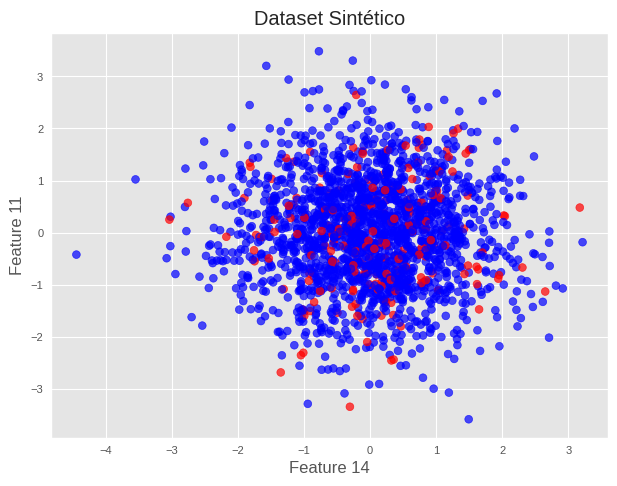

In [99]:
import numpy as np

estilo_random = np.random.choice(lista_estilos)
print(f"\nEstilo seleccionado aleatoriamente: {estilo_random}")
# plt.style.use(estilo_random)

plt.style.use('ggplot')
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=2000,        # número de filas
    n_features=20,         # número de columnas
    n_informative=5,       # features que realmente separan clases
    n_redundant=2,         # combinaciones lineales de informativas
    n_repeated=0,          # features repetidas
    n_classes=2,           # número de clases
    n_clusters_per_class=1 ,# clusters por clase (más -> frontera más compleja)
    class_sep=10,         # separación entre clases (más -> más fácil)
# flip_y=0.5,           # porcentaje de etiquetas volteadas (ruido en y)
    weights=[0.9, 0.1],    # desbalance 
    random_state=0
)
import numpy as np

feature_1 = np.random.randint(0, 20)
feature_2 = np.random.randint(0, 20)
plt.scatter(X[:, feature_1], X[:, feature_2], c=y, cmap='bwr', alpha=0.7)
plt.xlabel(f'Feature {feature_1}')
plt.ylabel(f'Feature {feature_2}')
plt.title('Dataset Sintético')
plt.show()

Cuando los datos caen en una línea pueden poner ruido (jitter) para que se aprecien diferencias

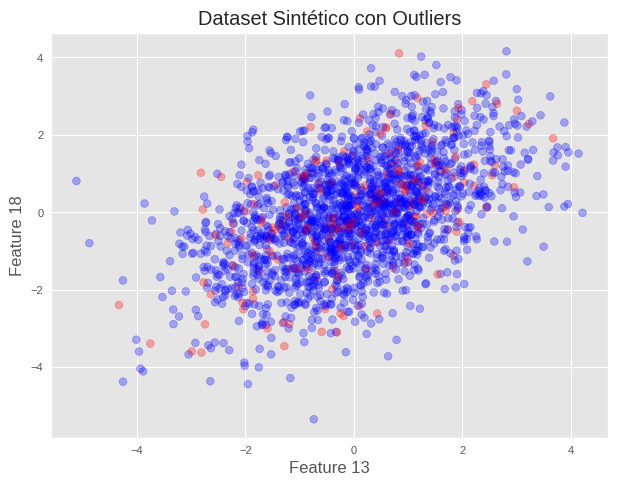

In [100]:
feature_1 = np.random.randint(0, 20)
feature_2 = np.random.randint(0, 20)
plt.scatter(X[:, 4]+ np.random.normal(0, 1, X.shape[0]), X[:, 4]+ np.random.normal(0, 1, X.shape[0]), c=y, cmap='bwr', alpha=0.3)
plt.xlabel(f'Feature {feature_1}')
plt.ylabel(f'Feature {feature_2}')
plt.title('Dataset Sintético con Outliers')
plt.show()

Para probar algo no supervisado

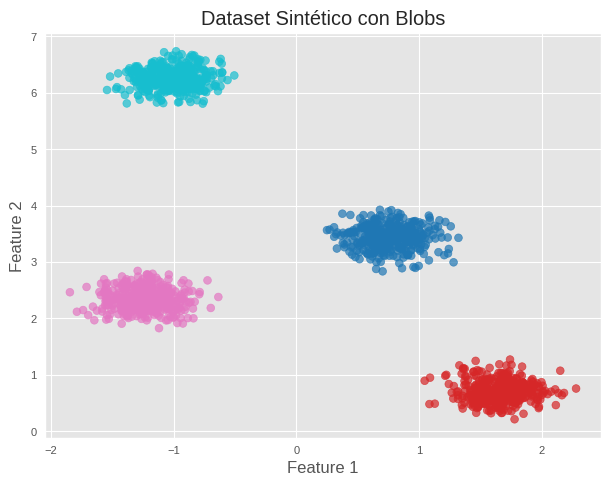

In [101]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=1500,
    centers=4,          # número de clusters
    n_features=2,
    cluster_std=0.2,    # dispersión (más -> más solapamiento)
    center_box=(-8, 8),
    random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Sintético con Blobs')
plt.show()

# Duplicados

La manera más fácil de producir un duplicado

In [102]:
import pandas as pd

df_1 = pd.DataFrame({'nombre': ['Juan', 'María', 'Pedro', 'Ana', 'Luis'],
                     'edad': [10, 20, 30, 40, 50]})

df_2 = pd.DataFrame({'nombre': ['Juan', 'María', 'María', 'Ana'], 'escolaridad': ['licenciatura', 'preparatoria', 'licenciatura', 'maestría']})

df_1.merge(df_2, on='nombre', how='left')

,nombre,edad,escolaridad
0,Juan,10,licenciatura
1,María,20,preparatoria
2,María,20,licenciatura
3,Pedro,30,NaN
4,Ana,40,maestría
5,Luis,50,NaN


¿Cómo le harían para ver si esto sucedió en un join?

# Outliers

## Histogramas

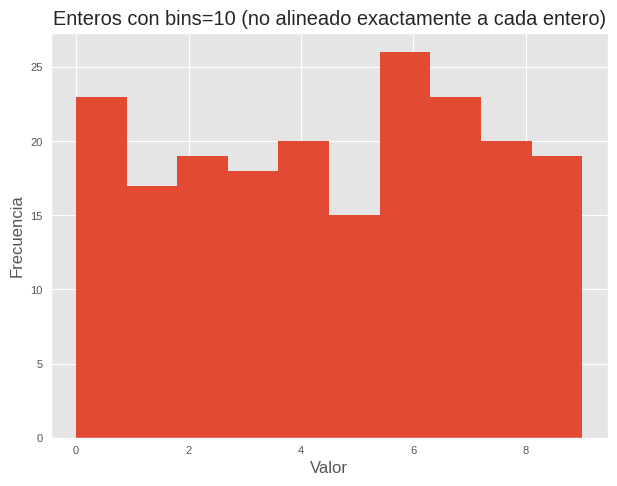

In [103]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

data_integers = np.random.randint(0, 10, size=200)

plt.figure()
plt.hist(data_integers, bins=10)
plt.title("Enteros con bins=10 (no alineado exactamente a cada entero)")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


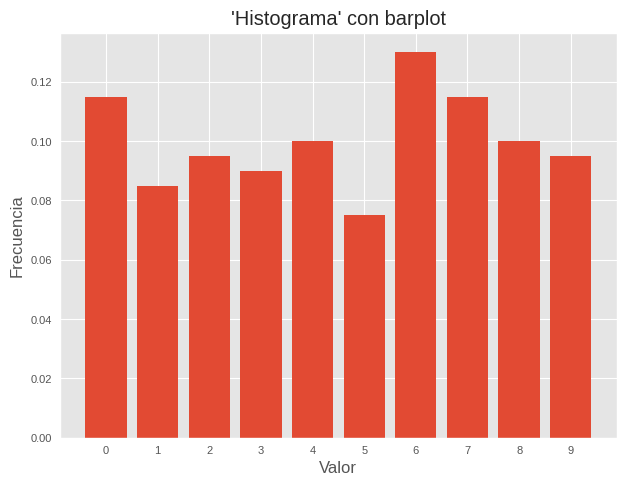

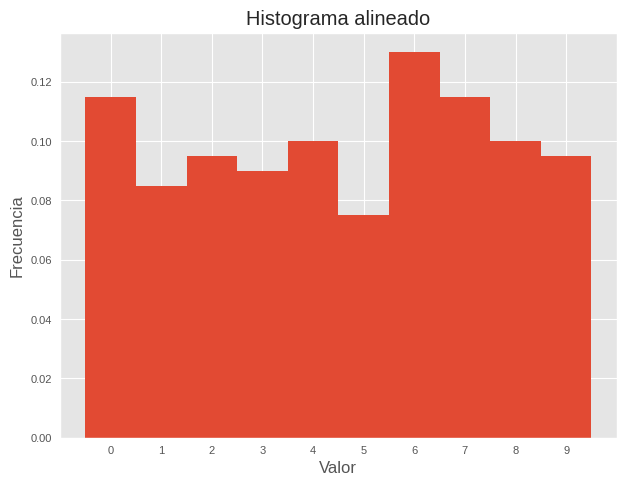

In [104]:
# Mejor hacemos un barplot con conteo de cada entero
plt.figure()
plt.bar(np.arange(10), np.array([np.sum(data_integers == i) for i in range(10)]) / len(data_integers))
plt.title("'Histograma' con barplot")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(10))
plt.show()

# Histograma alineando explícitamente los bins con los enteros
plt.figure()
plt.hist(data_integers, bins=np.arange(-0.5, 10.5, 1), density=True)
plt.title("Histograma alineado")
plt.xlabel("Valor")
plt.xticks(np.arange(10))
plt.ylabel("Frecuencia")
plt.show()

## Colas largas

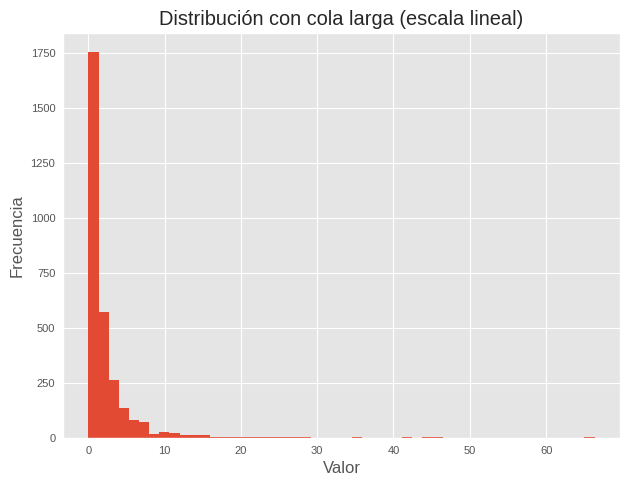

In [105]:
data_long_tail = np.random.lognormal(mean=0, sigma=1.2, size=3000)

# Histograma en escala lineal
plt.figure()
plt.hist(data_long_tail, bins=50)
plt.title("Distribución con cola larga (escala lineal)")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


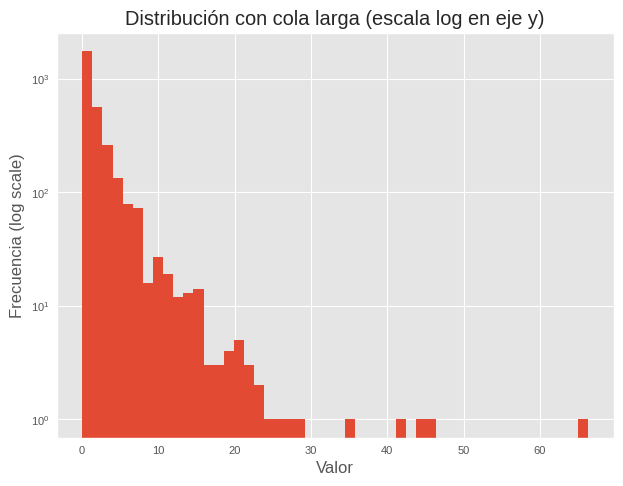

In [106]:
plt.figure()
plt.hist(data_long_tail, bins=50)
plt.yscale("log")
plt.title("Distribución con cola larga (escala log en eje y)")
plt.xlabel("Valor")
plt.ylabel("Frecuencia (log scale)")
plt.show()

## Outliers

Text(0, 0.5, 'Frecuencia')

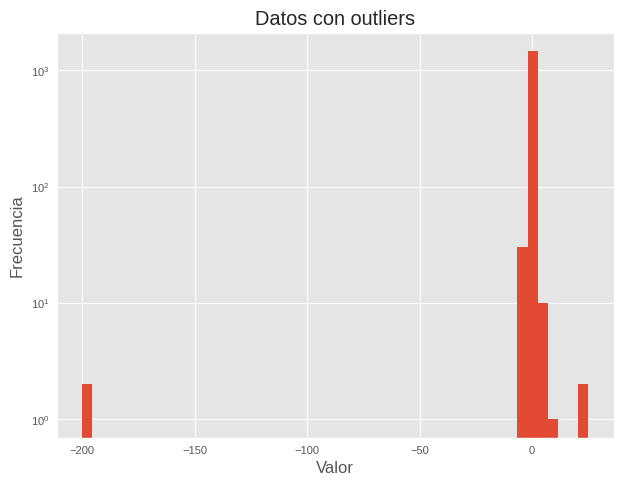

In [107]:
data =   np.random.normal(loc=0, scale=1, size=1500)
outlier_points = np.array([10, -200,25,-200,25]) # Se le agregan manualmente algunos outliers extremos 

data_with_outliers = np.r_[data, outlier_points]
plt.figure()
plt.hist(data_with_outliers, bins=50)
plt.title("Datos con outliers")
plt.yscale("log")  # para ver mejor la frecuencia de los outliers
plt.xlabel("Valor")
plt.ylabel("Frecuencia") 

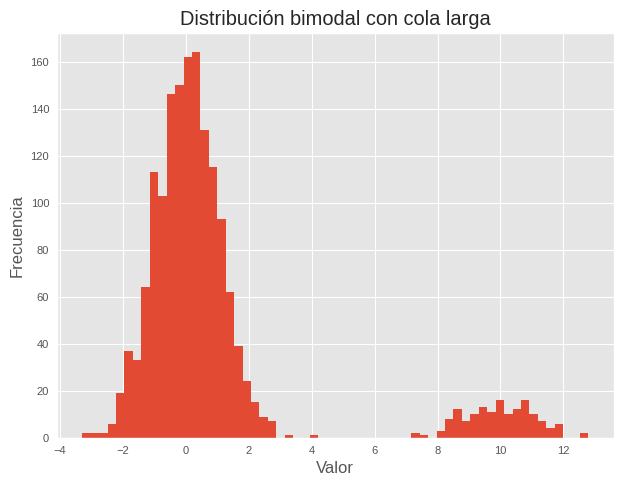

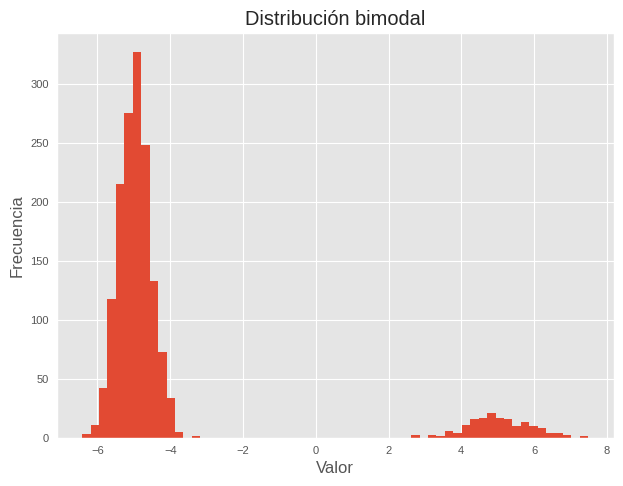

In [108]:
data_bimodal = np.concatenate([
    np.random.normal(loc=0, scale=1, size=1500),
    np.random.normal(loc=10, scale=1, size=150),
])

plt.figure()
plt.hist(data_bimodal, bins=60)
plt.title("Distribución bimodal con cola larga")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


data_bimodal = make_classification(n_samples=1650, n_features=1, n_informative=1, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=5, flip_y=0, weights=[0.9, 0.1], random_state=42)[0].flatten()

plt.figure()
plt.hist(data_bimodal, bins=60)
plt.title("Distribución bimodal")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


# Boxplots

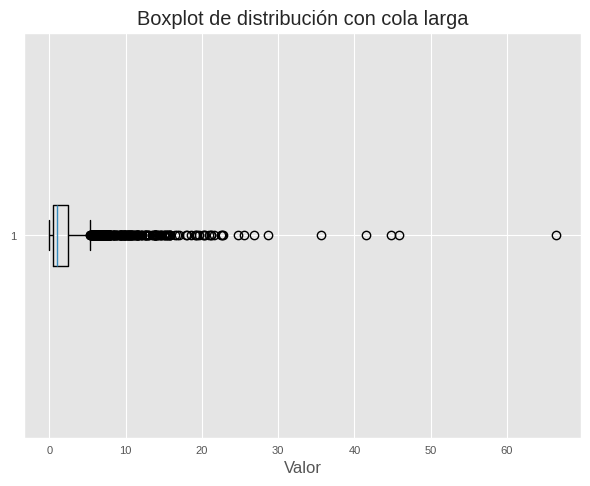

In [109]:
plt.boxplot(data_long_tail, vert=False)
plt.title("Boxplot de distribución con cola larga")
plt.xlabel("Valor")
plt.show()

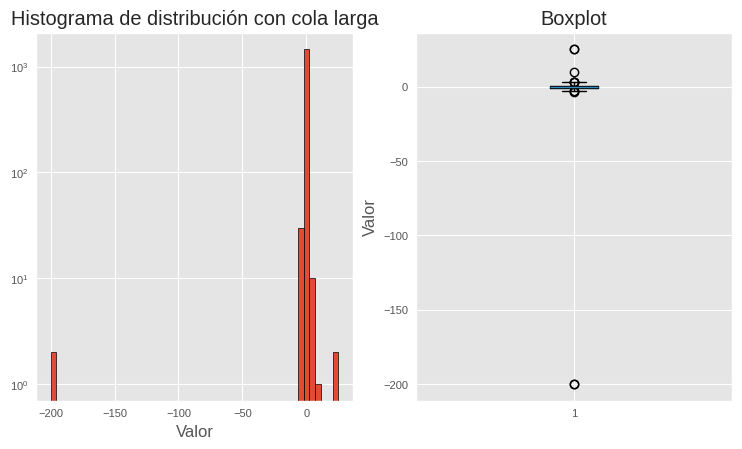

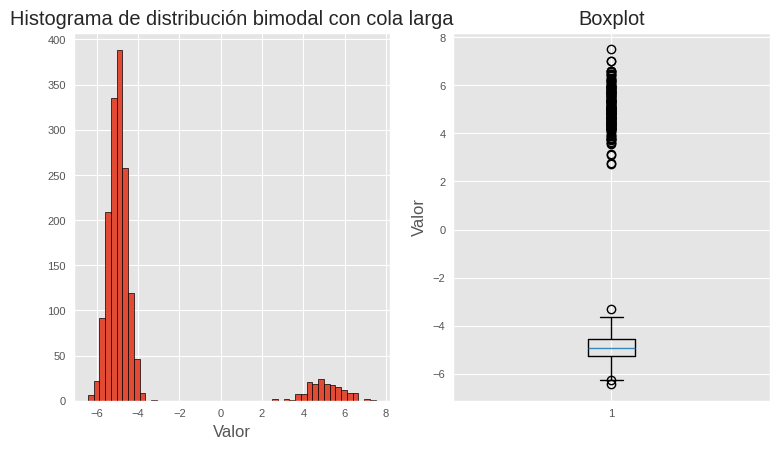

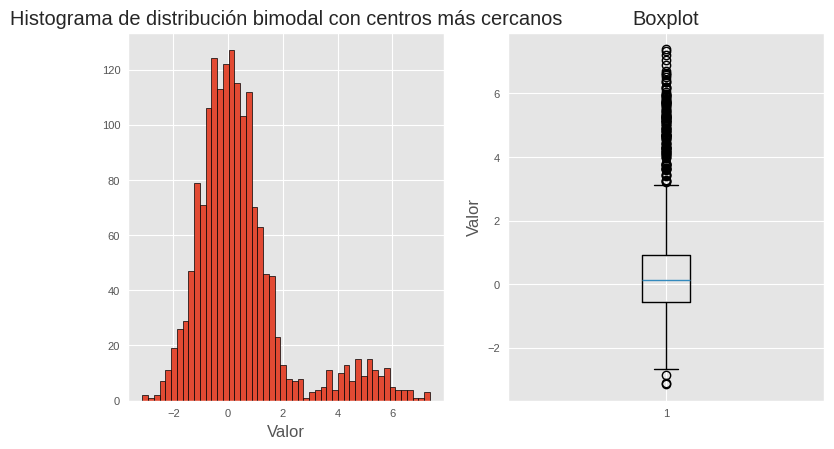

In [115]:
fig,ax = plt.subplots(1,2, figsize=(8,4))
ax[0].hist(data_with_outliers, bins=50, edgecolor='black')
ax[0].set_title("Histograma de distribución con cola larga")
ax[0].set_xlabel("Valor")
ax[0].set_yscale("log")  # para ver mejor la frecuencia de los outliers
ax[1].boxplot(data_with_outliers, vert=True)
ax[1].set_title("Boxplot")
ax[1].set_ylabel("Valor")
plt.show()

# bimodal, parece que tiene muchos outilers pero en realidad es la otra moda
fig,ax = plt.subplots(1,2, figsize=(8,4))
ax[0].hist(data_bimodal, bins=50, edgecolor='black')
ax[0].set_title("Histograma de distribución bimodal con cola larga")
ax[0].set_xlabel("Valor")
ax[1].boxplot(data_bimodal, vert=True)
ax[1].set_title("Boxplot")
ax[1].set_ylabel("Valor")
plt.show()

data_bimodal_cercana = np.concatenate([
    np.random.normal(loc=0, scale=1, size=1500),
    np.random.normal(loc=5, scale=1, size=150),
])

fig,ax = plt.subplots(1,2, figsize=(8,4))
ax[0].hist(data_bimodal_cercana, bins=50, edgecolor='black')
ax[0].set_title("Histograma de distribución bimodal con centros más cercanos")
ax[0].set_xlabel("Valor")
ax[1].boxplot(data_bimodal_cercana, vert=True)
ax[1].set_title("Boxplot")
ax[1].set_ylabel("Valor")
plt.show()



Versión estrictamente superior violin plots

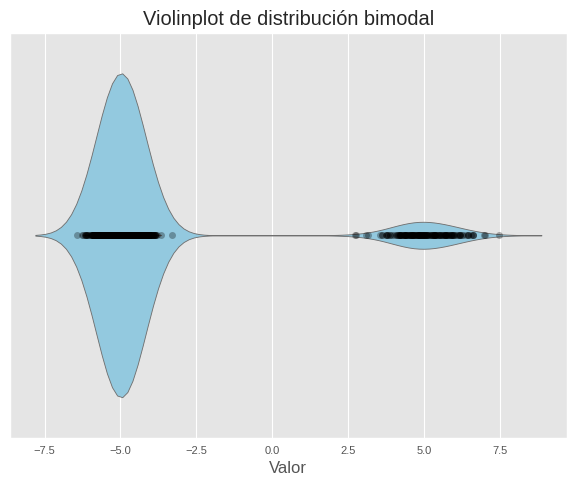

In [116]:
import seaborn as sns

# violinplot
plt.figure()
sns.violinplot(x=data_bimodal, inner="box", color="skyblue")
# add points
sns.stripplot(x=data_bimodal, color="black", alpha=0.3, size=5,jitter=False)
plt.title("Violinplot de distribución bimodal")
plt.xlabel("Valor")
plt.show()

Útiles para hacer comparaciones entre diferentes subgrupos

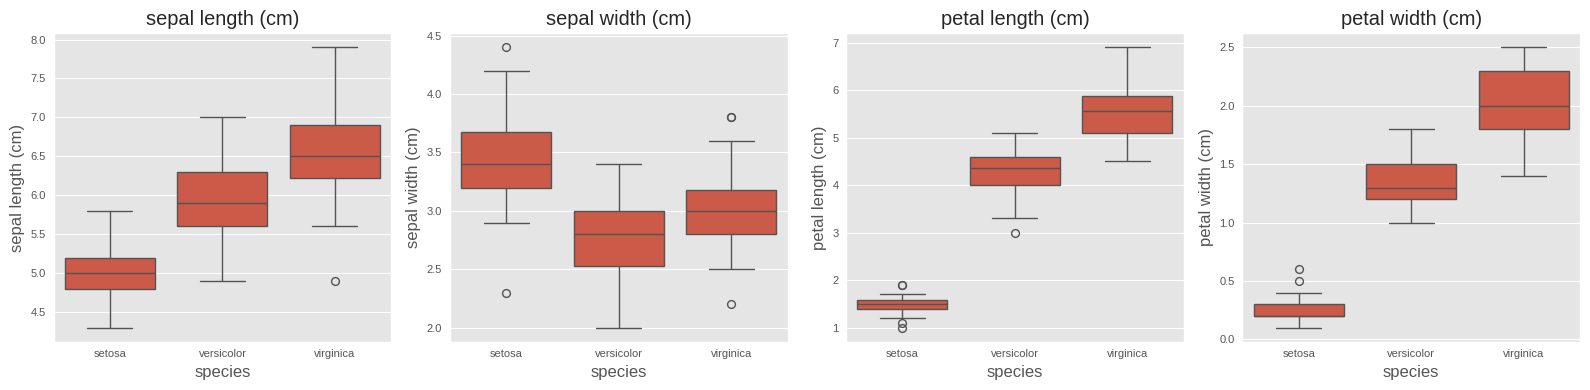

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [138]:
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

fig, axes = plt.subplots(1, len(iris.feature_names), figsize=(16,4))
for ax, feat in zip(axes, iris.feature_names):
    sns.boxplot(x='species', y=feat, data=df_iris, ax=ax)
    ax.set_title(feat)
plt.tight_layout()
plt.show()

df_iris


## Cortando por cuantiles

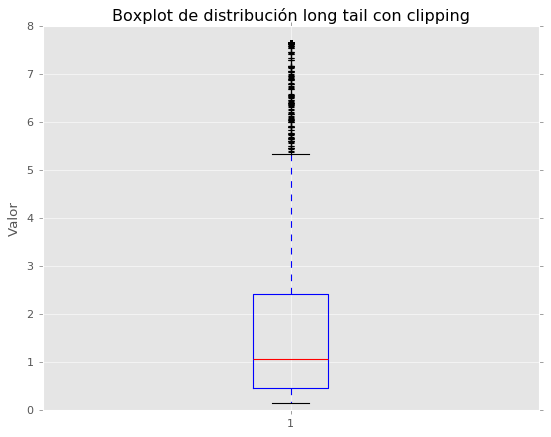

In [244]:
df = pd.DataFrame({'data_long_tail':data_long_tail})
df['data_long_tail'].quantile(0.25), df['data_long_tail'].quantile(0.75)

df_1 = df.clip(lower=df['data_long_tail'].quantile(0.05), upper=df['data_long_tail'].quantile(0.95))
plt.boxplot(df_1['data_long_tail'], vert=True)
plt.title("Boxplot de distribución long tail con clipping")
plt.ylabel("Valor")
plt.show()

# Rango interquantil

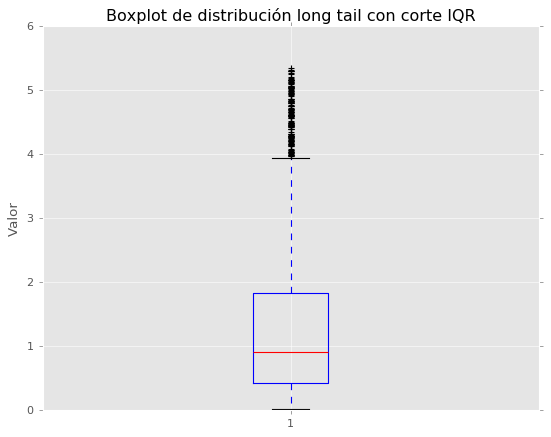

In [245]:
# cortandop por rango intercuantilico
Q1 = df['data_long_tail'].quantile(0.25)
Q3 = df['data_long_tail'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_iqr = df[(df['data_long_tail'] >= lower_bound) & (df
['data_long_tail'] <= upper_bound)]
plt.boxplot(df_iqr['data_long_tail'], vert=True)
plt.title("Boxplot de distribución long tail con corte IQR")
plt.ylabel("Valor")
plt.show()

# Por z score

Muy parecido a quitar por cuantiles, pero aquí la asunción es que los datos son normales. Quitamos aquellos que aparezcan con probabilidad muy baja

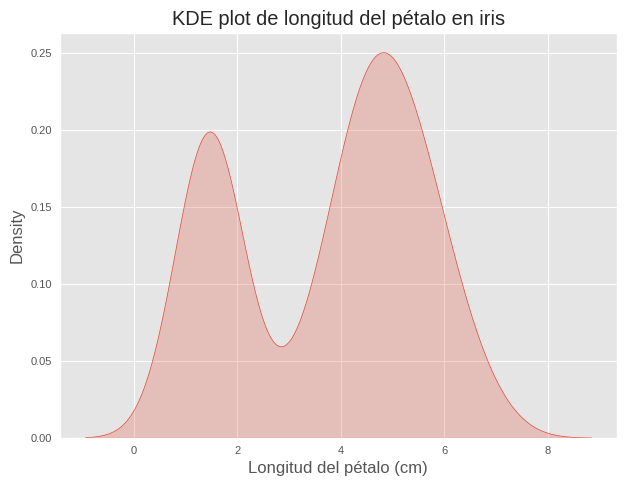

In [135]:
# plot points
sns.kdeplot(df_iris['petal length (cm)'],  fill=True)
plt.title("KDE plot de longitud del pétalo en iris")
plt.xlabel("Longitud del pétalo (cm)")
plt.show()

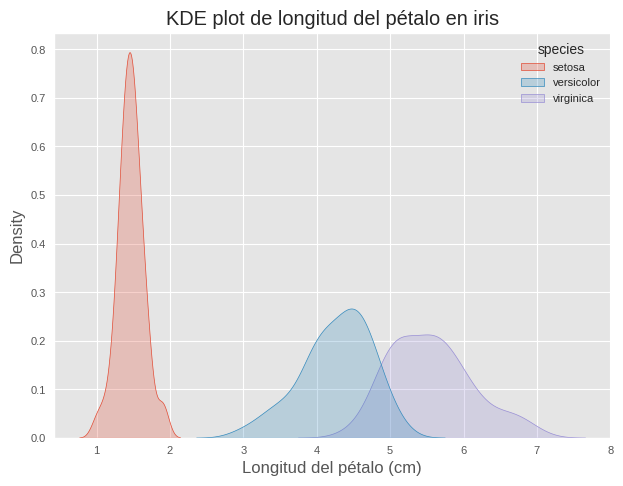

In [142]:
sns.kdeplot(data=df_iris, x='petal length (cm)', hue='species', fill=True)
plt.title("KDE plot de longitud del pétalo en iris")
plt.xlabel("Longitud del pétalo (cm)")
plt.show()

<Axes: >

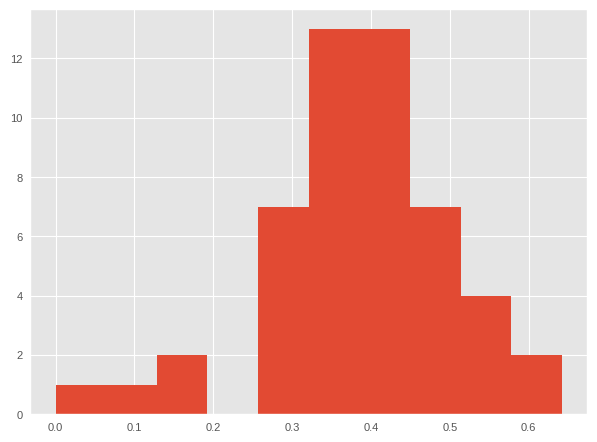

In [156]:
np.log(df_iris.query('species == "setosa"')['petal length (cm)']).hist()

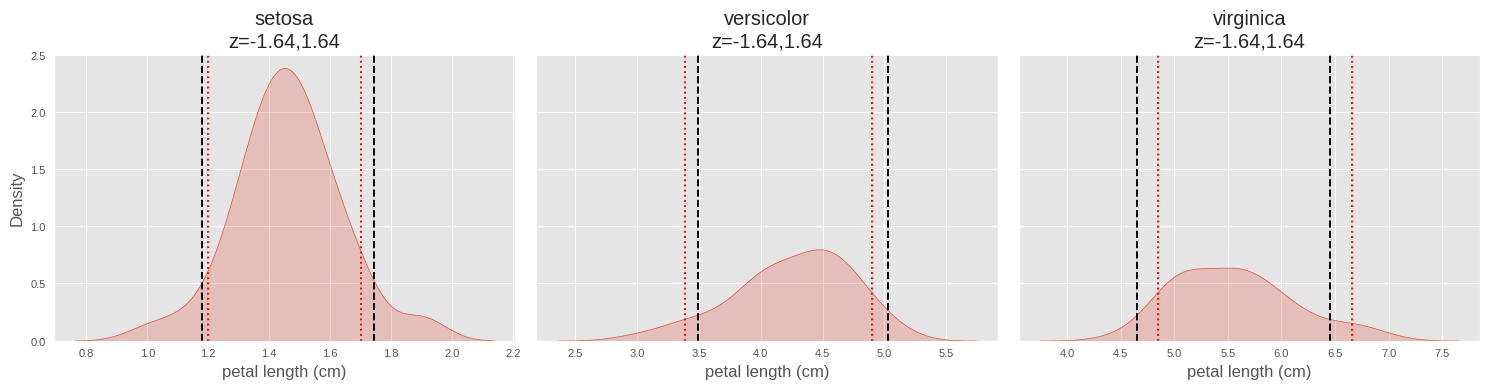

In [159]:
from scipy.stats import norm


col = "petal length (cm)"

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
species_order = ["setosa", "versicolor", "virginica"]

z_lo = norm.ppf(0.05)   # ≈ -1.645
z_hi = norm.ppf(0.95)   # ≈  1.645

for ax, sp in zip(axes, species_order):
    g = df[df["species"] == sp]
    x = g[col].to_numpy()
    mu = x.mean()
    sd = x.std(ddof=0)

    x_lo = mu + z_lo * sd
    x_hi = mu + z_hi * sd

    cuantiles_datos = np.percentile(x, [5, 95])

    sns.kdeplot(x=x, fill=True, ax=ax)
    ax.axvline(x_lo, linestyle="--")
    ax.axvline(x_hi, linestyle="--")

    ax.axvline(cuantiles_datos[0], linestyle=":", color="red")
    ax.axvline(cuantiles_datos[1], linestyle=":", color="red")

    ax.set_title(f"{sp}\nz={z_lo:.2f},{z_hi:.2f}")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

# Métodos multidimensionales

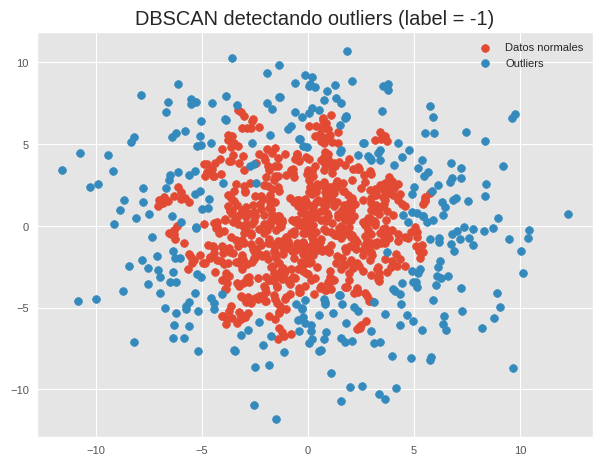

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs


import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

X, Y = make_gaussian_quantiles(n_features=2, n_samples=1000, cov=15, n_classes=3, random_state=0)

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)

outlier_mask = labels == -1

plt.figure()
plt.scatter(X[~outlier_mask, 0], X[~outlier_mask, 1], label="Datos normales")
plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1], label="Outliers")
plt.legend()
plt.title("DBSCAN detectando outliers (label = -1)")
plt.show()

# isolation forest

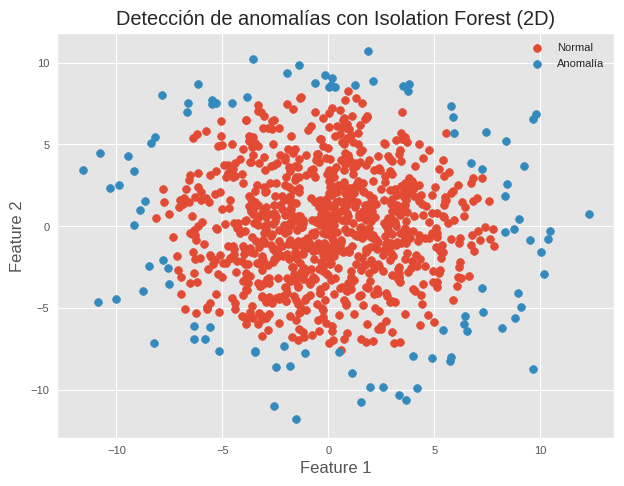

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Entrenamos Isolation Forest con dos características
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X)

# Predicción de anomalías (-1 es anómalo, 1 es normal)
y_pred = clf.predict(X)
labels_db = db.fit_predict(X)

clf.fit(X)
labels_clf = clf.predict(X)

out_iso = labels_clf == -1  # True = outlier
out_db = labels_db == -1  # True = outlier

# Visualización de los datos y las anomalías detectadas
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1] ,label="Normal")
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], label="Anomalía")

plt.title("Detección de anomalías con Isolation Forest (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


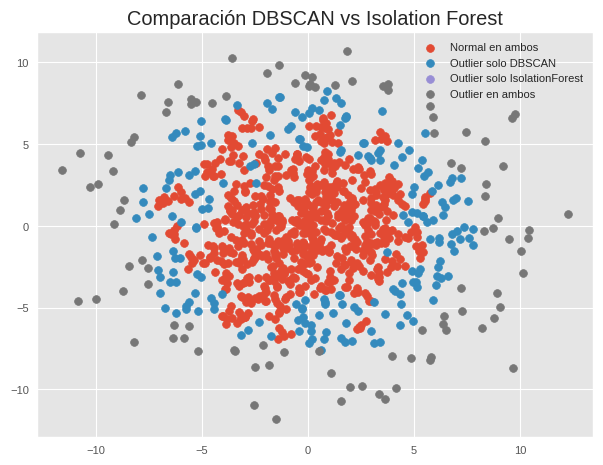

In [190]:

combined = np.zeros(len(X))
combined[np.logical_and(out_db, ~out_iso)] = 1
combined[np.logical_and(~out_db, out_iso)] = 2
combined[np.logical_and(out_db, out_iso)] = 3

plt.figure()
plt.scatter(X[combined == 0, 0], X[combined == 0, 1], label="Normal en ambos")
plt.scatter(X[combined == 1, 0], X[combined == 1, 1], label="Outlier solo DBSCAN")
plt.scatter(X[combined == 2, 0], X[combined == 2, 1], label="Outlier solo IsolationForest")
plt.scatter(X[combined == 3, 0], X[combined == 3, 1], label="Outlier en ambos")

plt.title("Comparación DBSCAN vs Isolation Forest")
plt.legend()
plt.show()